Now let's look into the HSL and HSI colorspaces


In [1]:
# Starting with the usual imports
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt
import cv2
from PIL import Image

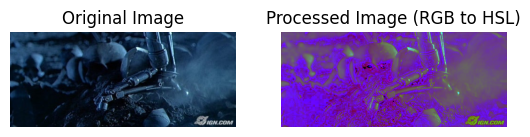

In [2]:
# Load the RIT image and convert to HSL
baseImg = cv2.imread('terminator-skull.jpg')
rgb = cv2.cvtColor(baseImg, cv2.COLOR_BGR2RGB)
hsl_image = cv2.cvtColor(baseImg, cv2.COLOR_BGR2HLS)

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(rgb)
plt.axis('off')

# Processed Image (in RGB)
plt.subplot(1, 2, 2)
plt.title('Processed Image (RGB to HSL)')
plt.imshow(hsl_image)
plt.axis('off')
plt.imshow(hsl_image)
plt.show()

Now let's compare HSV to HSL

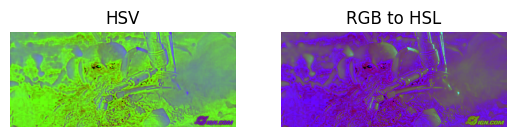

In [3]:
# Load the RIT image and convert to HSL
baseImg = cv2.imread('terminator-skull.jpg')
rgb = cv2.cvtColor(baseImg, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(baseImg, cv2.COLOR_BGR2HSV)
hsl_image = cv2.cvtColor(baseImg, cv2.COLOR_BGR2HLS)

# Original Image
plt.subplot(1, 2, 1)
plt.title('HSV')
plt.imshow(hsv_image)
plt.axis('off')

# Processed Image (in RGB)
plt.subplot(1, 2, 2)
plt.title('RGB to HSL')
plt.imshow(hsl_image)
plt.axis('off')
plt.imshow(hsl_image)
plt.show()

In [4]:
# Load the RIT image and convert to HSI
baseImg = cv2.imread('RIT.jpg')
img = cv2.cvtColor(baseImg, cv2.COLOR_BGR2HSI)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(rgb)
plt.axis('off')

plt.imshow(img)
plt.show()

AttributeError: module 'cv2' has no attribute 'COLOR_BGR2HSI'

Sad trombone noises...
openCV does not have a function to directly convert to BGR to HSI
Can we do this one manually?

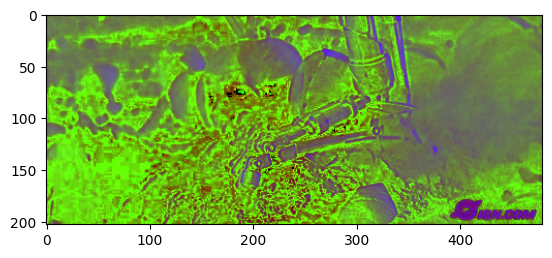

In [5]:
# Can we do this manually?
bgr_image = cv2.imread('terminator-skull.jpg')

# Get the dimensions of the image
height, width, _ = bgr_image.shape

# Create an empty array for the HSI image
hsi_image = np.zeros((height, width, 3), dtype=np.uint8)

# Iterate over each pixel
for i in range(height):
    for j in range(width):
        # Get the B, G, R components and normalize them to [0, 1]
        b = bgr_image[i, j, 0] / 255.0
        g = bgr_image[i, j, 1] / 255.0
        r = bgr_image[i, j, 2] / 255.0

        # Calculate Intensity
        intensity = (r + g + b) / 3

        # Calculate Saturation
        min_val = min(r, g, b)
        saturation = 0 if intensity == 0 else 1 - (min_val / intensity)

        # Calculate Hue
        if saturation == 0:
            hue = 0
        else:
            num = 0.5 * ((r - g) + (r - b))
            den = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
            theta = np.arccos(num / (den + 1e-6))  # Add a small epsilon to avoid division by zero
            if b <= g:
                hue = theta
            else:
                hue = 2 * np.pi - theta

        hue = np.degrees(hue)  # Convert to degrees
        hue = hue / 2  # Scale hue to [0, 179] for OpenCV

        # Scale Saturation and Intensity to [0, 255]
        saturation = saturation * 255
        intensity = intensity * 255

        # Set the HSI values to the image
        hsi_image[i, j] = [hue, saturation, intensity]
   


plt.imshow(hsi_image)
plt.show()

(np.float64(-0.5), np.float64(479.5), np.float64(202.5), np.float64(-0.5))

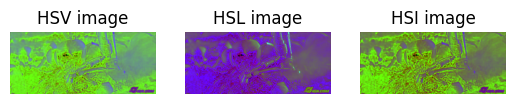

In [6]:
# Now let's look at all three side-by-side
plt.subplot(1, 3, 1)
plt.title('HSV image')
plt.imshow(hsv_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('HSL image')
plt.imshow(hsl_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('HSI image')
plt.imshow(hsi_image)
plt.axis('off')

#plt.imshow(img)
#plt.show()

There's lots more ways to convert between RGB, HSV, HSL, and HSI in openCV. 
Like HSI, there can sometimes be intermediate steps that you have to write on your own.
It's up to you to explore the wider range of options as you go through the rest of this class.